In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [3]:
train_labels[0]

1

In [8]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.5231 - accuracy: 0.7901 - val_loss: 0.3921 - val_accuracy: 0.8665
Epoch 2/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.3072 - accuracy: 0.9053 - val_loss: 0.3066 - val_accuracy: 0.8857
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2248 - accuracy: 0.9263 - val_loss: 0.2889 - val_accuracy: 0.8847
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1739 - accuracy: 0.9452 - val_loss: 0.2784 - val_accuracy: 0.8884
Epoch 5/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1428 - accuracy: 0.9554 - val_loss: 0.2901 - val_accuracy: 0.8867
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1160 - accuracy: 0.9642 - val_loss: 0.3397 - val_accuracy: 0.8750
Epoch 7/20
15000/15000 [==============================] - 1s 9

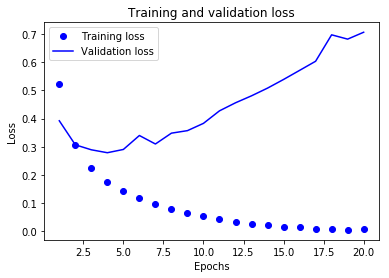

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
history_dict.keys()

['loss', 'val_accuracy', 'val_loss', 'accuracy']

In [ ]:
vall_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
